# Final Project Report

## 1. Main information
### 1.1. Main and helper functions

The file `imdb_code.py` contains four functions implemented:
* get_actors_by_movie_soup(cast_page_soup, num_of_actors_limit=None)
* get_movies_by_actor_soup(actor_page_soup, num_of_movies_limit=None)
* get_movie_distance(actor_start_url, actor_end_url, num_of_actors_limit=None, num_of_movies_limit=None, max_distance=10, cur_status=0)
* get_movie_descriptions_by_actor_soup(actor_page_soup, cur_status=0)


The file `imdb_helper_functions.py` contains helper functions necessary for code to work:
* get_actor_soup(actor_url) 
* get_movie_soup(movie_url)
* replace_www(url)
* read_log(log_type)
* write_log(obj, log_type)
* graph_picture(graph, colors, distances_filter=None)

The discriprions of function arguments you can see in the files `imdb_code.py` and `imdb_helper_functions.py`


### 1.2. Others files and information

1. The code for collection data and calculating distances for top-10 actors is into the file `imdb_code.py` (see block $if __name__ == '__main__'$). 


2. All scraping data for calculating distances was saved on the hard disk into the pickle files:
    * `log_actors.pkl`
    * `log_movies.pkl`
    * `log_distances.pkl`


3. Grahp representation for top-10 actors was saved into the file:
    * `distances.csv`


4. All movies descriptions for top-10 actors was saved in directory `movies_descriptions` into the files:
    * `Adam Sandler.txt`
    * `Akshay Kumar.txt`
    * `Bradley Cooper.txt`
    * `Chris Evans.txt`
    * `Chris Hemsworth.txt`
    * `Dwayne Johnson.txt`
    * `Jackie Chan.txt`
    * `Robert Downey Jr..txt`
    * `Scarlett Johansson.txt`
    * `Sofia Vergara.txt`


5. The file `prepositions.csv` contains english prepositions for includings its to stop-words list.



## 2. Visualisation the distances as a graph

In [32]:
import pickle
import networkx as nx
import imdb_helper_functions as hf
import imdb_code as ic
import os
from collections import Counter
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

####  2.1. Load the list of distances collected in the previous stages of the project:
Distances were calculated without restrictions on the attributes: num_of_movies_limit and num_of_actors_limit. The maximum distance was limited to 10.

In [35]:
with open('log_distances.pkl', 'rb') as pickle_dist:
    distances = pickle.load(pickle_dist)

distance_list = []
for key in distances:
    distance_list.append((key[0], key[1], distances[key]))
    

Let's see the maximum distance to determine the graph parameters:

In [34]:
print('Maximum distance =', max(distances.values()))

Maximum distance = 2


#### 2.3. Let's write the graph to 'csv' file:
(format: 'actor-i','actor-j','distanse_from_actor-i_to_actor-j' (i <> j))

In [31]:
with open("distances.csv", "w", encoding="utf-8") as f:
    for key, value in distances.items():
        f.writelines([f"{key[0]},{key[1]},{value}\n"])

#### 2.4. Let's draw three graphs::

In [37]:
# highest-paid actors of 2019

top_actors = {'Dwayne Johnson': 'https://www.imdb.com/name/nm0425005/',
              'Chris Hemsworth': 'https://www.imdb.com/name/nm1165110/',
              'Robert Downey Jr.': 'https://www.imdb.com/name/nm0000375/',
              'Akshay Kumar': 'https://www.imdb.com/name/nm0474774/',
              'Jackie Chan': 'https://www.imdb.com/name/nm0000329/',
              'Bradley Cooper': 'https://www.imdb.com/name/nm0177896/',
              'Adam Sandler': 'https://www.imdb.com/name/nm0001191/',
              'Scarlett Johansson': 'https://www.imdb.com/name/nm0424060/',
              'Sofia Vergara': 'https://www.imdb.com/name/nm0005527/',
              'Chris Evans': 'https://www.imdb.com/name/nm0262635/'}


Create a graph in format NetworkX:

In [36]:
graph = nx.Graph()
graph.add_nodes_from(top_actors.keys())
graph.add_weighted_edges_from(distance_list)

Colors for edges (maximum distance = 2):

In [6]:
colors = {1: 'red', 2: 'green'}

Let's draw the whole graph with all edges:

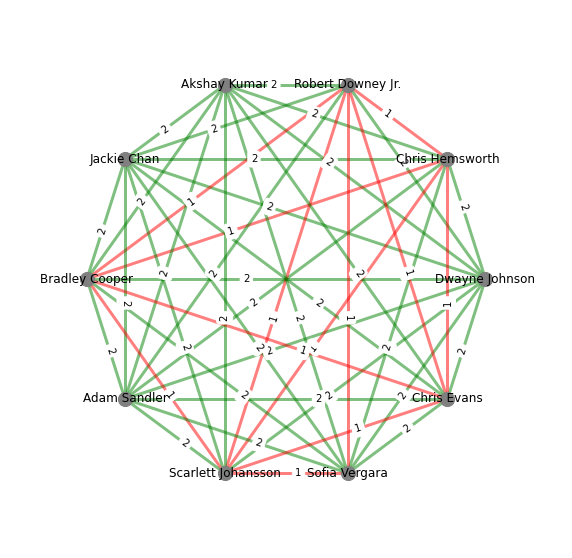

In [7]:
hf.graph_picture(graph, colors, distances_filter=None)

Let's draw a graph with edges for distances=1:

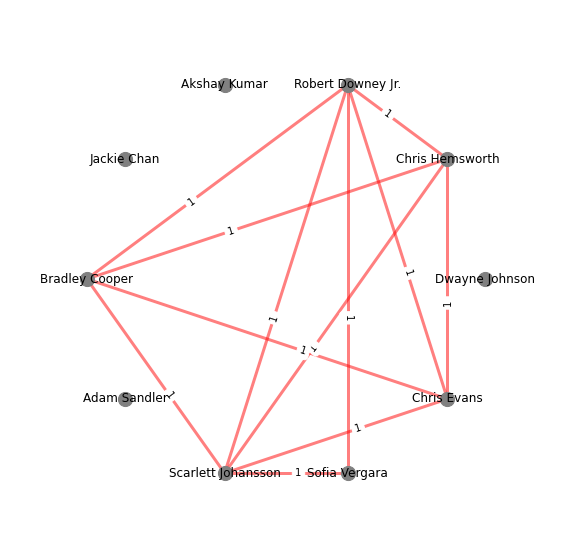

In [7]:
hf.graph_picture(graph, colors, distances_filter=1)

Let's draw a graph with edges for distances=2:

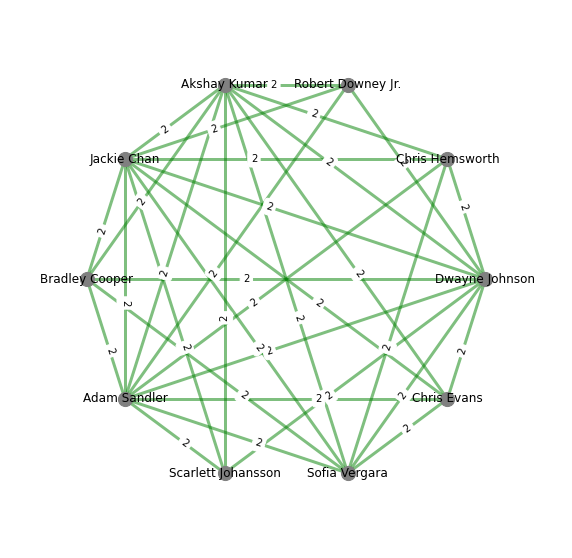

In [8]:
hf.graph_picture(graph, colors, distances_filter=2)

## 3. Word cloud based on an actor's movies descriptions

#### 3.1. Scraping and loading the movies discriptions into the 'txt' files:

In [12]:
dir_descriptions = 'movies_descriptions'

for key in top_actors.keys():
    actor_url = top_actors[key]
    actor_page_soup = hf.get_actor_soup(actor_url)
    movies_descriptions = ic.get_movie_descriptions_by_actor_soup(actor_page_soup, cur_status=1)
    
    if not os.path.exists(dir_descriptions):
        os.makedirs(dir_descriptions)
        
    txt_file_description = key + '.txt'
    
    path = os.path.join(dir_descriptions, txt_file_description)
    
    with open(path, 'w', encoding='utf-8') as f:
        for d in movies_descriptions:
            f.write("%s\n" % d)
            
    print(f'{key}: {len(movies_descriptions)} movie descriptions')
    print('===================================\n')

Number of movies found:  41
Dwayne Johnson: 41 movie descriptions

Number of movies found:  26
Chris Hemsworth: 26 movie descriptions

Number of movies found:  73
Robert Downey Jr.: 73 movie descriptions

Number of movies found:  134
Dil Pardesi Ho Gaya have not description
Chundadi Ni Laaj have not description
Akshay Kumar: 132 movie descriptions

Number of movies found:  126
Jackie Chan: 126 movie descriptions

Number of movies found:  39
Bradley Cooper: 39 movie descriptions

Number of movies found:  52
Adam Sandler: 52 movie descriptions

Number of movies found:  53
Scarlett Johansson: 53 movie descriptions

Number of movies found:  26
Sofia Vergara: 26 movie descriptions

Number of movies found:  37
Chris Evans: 37 movie descriptions



#### 3.2. Let's take prepositions from the `prepositions.csv` file to include in the stop word list:

In [38]:
prepositions = pd.read_csv('prepositions.csv', sep=',')
prepositions[:5]

,preposition
0,aboard
1,about
2,above
3,absent
4,across


#### 3.3. Create stop-words list:

In [24]:
stopwords = set(STOPWORDS)
stopwords.update(prepositions['preposition'])
stopwords.add('вЂ')

#### 3.4. Draw keyword clouds for the top-10 actors:

Cloud top-100 words for Dwayne Johnson:


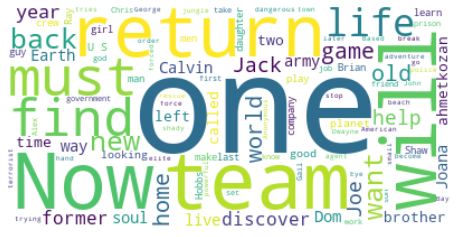


Cloud top-100 words for Chris Hemsworth:


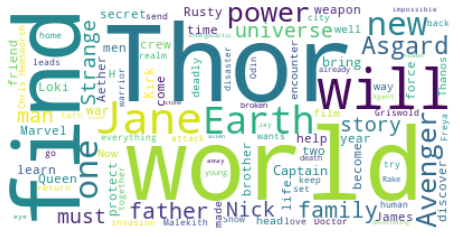


Cloud top-100 words for Robert Downey Jr.:


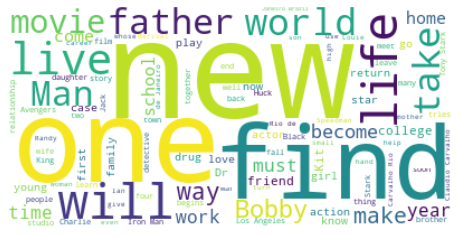


Cloud top-100 words for Akshay Kumar:


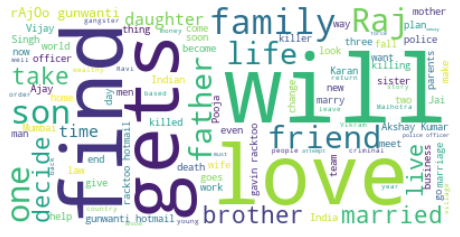


Cloud top-100 words for Jackie Chan:


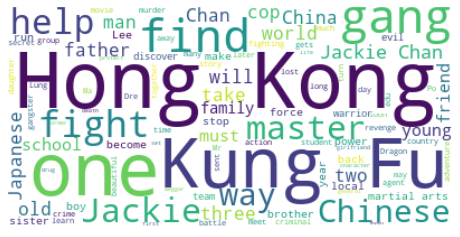


Cloud top-100 words for Bradley Cooper:


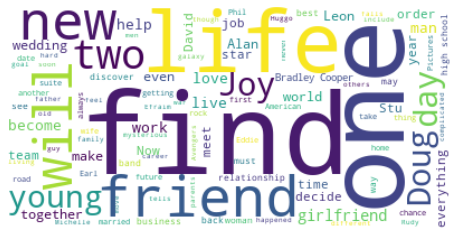


Cloud top-100 words for Adam Sandler:


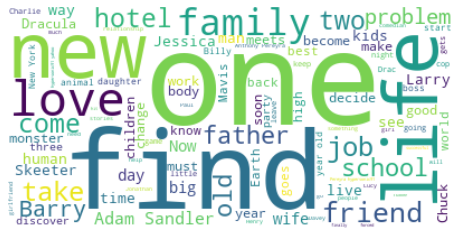


Cloud top-100 words for Scarlett Johansson:


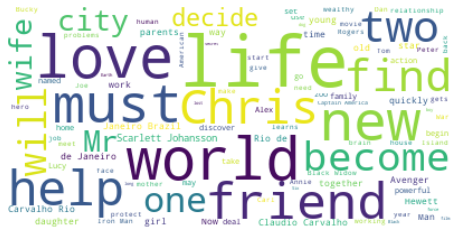


Cloud top-100 words for Sofia Vergara:


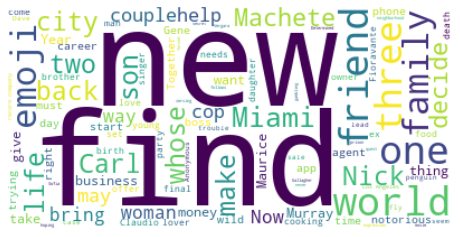


Cloud top-100 words for Chris Evans:


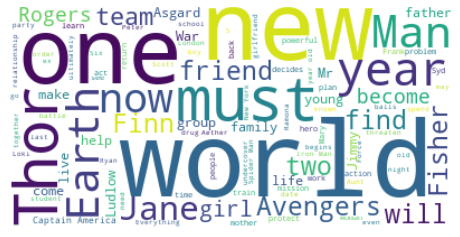

In [28]:
dir_descriptions = 'movies_descriptions'
max_words = 100

for actor in top_actors.keys():
    txt_file_description = actor + '.txt'
    path = os.path.join(dir_descriptions, txt_file_description)
    
    with open(path) as f:
        content = f.readlines()
        
    text = " ".join(review for review in content)
    
    wc = WordCloud(background_color="white", 
                   max_words=max_words, 
                   stopwords=stopwords, 
                   contour_width=3, 
                   contour_color='firebrick')
    wc.generate(text)
    
    print(f'Cloud top-{max_words} words for {actor}:')
    plt.figure(figsize=[8,5])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('=====================================================================\n')

#### 3.5. Conclusion
We see that clouds contain many common words that are found in almost all actors (words like 'find', 'new', 'one', 'must', 'will', 'world', etc.). Therefore, the built clouds do not describe a particular actor and his films very well. To better clear the clouds of frequently used words, we can use NLP methods such as TF-IDF.